# Analysis of Collision in New York City 

Car accidents happen in New york City at an alarming rate. Thousands of people suffer personal injuries everyday. According to the New York City Police Department, there were 228,047 car accidents in 2018 citywide. That breaks down to:

19,000 Car Accidents per month
4,750 Car Accidents per week
678 Car Accidents per day
28 Car Accidents per hour
1 Car Accident every 2 minute

The question that arise from this are:
What location of new york city has most number of accidents occured? 
What were the causes? 
Did most of the accidents occur on rush hour or in midnight hours?

In the analysis given below we try to analyze the different factors that affect these accidents. 

## Problem Statement

Analyse the factors that affect collisions and accidents in New York City. 

#### Parameters

> Location of the accident

> Date and Time of the accident

> Number of people killed and/or injured

> Number of collisions

> Accident Information(Causes for Accidents and Vehicle Information)

### Data Setup

First we will import the library such as numpy, scipy and matplotlib to manipulate, analyze and visualize our data. The second task for setting up our data set is by importing our dataset from a csv to our notebook. Here the csv file is converted into a set of data frames

In [2]:
#importing libraries
import os
import numpy as np                #importing numpy array as np
import pandas as pd               #importing pandas library as pd
import scipy as sc                #importing scipy as sc
import matplotlib.pyplot as plt   #importing matplotlib as plt

In [3]:
pd.options.display.max_rows = 20
pd.options.display.max_columns=55

In [4]:
#Read CSV (comma-separated) is a function which reads data from csv file returns list of DataFrames
table = pd.read_csv("nypd-motor-vehicle-collisions.csv")
table.head()

/Users/saket/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-10-12T00:00:00.000,14:45,QUEENS,11436,40.667786,-73.79968,"{'coordinates': [-73.79968, 40.667786], 'type'...",NaN,NaN,138-10 135 AVENUE,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,4222455,Taxi,Sedan,NaN,NaN,NaN
1,2019-10-12T00:00:00.000,19:10,NaN,NaN,40.732162,-73.99431,"{'coordinates': [-73.99431, 40.732162], 'type'...",EAST 9 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4222160,2015,Taxi,NaN,NaN,NaN
2,2019-10-11T00:00:00.000,12:45,NaN,NaN,NaN,NaN,NaN,BRONX RIVER PARKWAY RAMP,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,NaN,NaN,NaN,NaN,4222892,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2019-10-11T00:00:00.000,15:36,NaN,NaN,NaN,NaN,NaN,School street,Oakdale street,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4221708,Sedan,NaN,NaN,NaN,NaN
4,2019-10-11T00:00:00.000,16:41,NaN,NaN,40.726814,-73.83846,"{'coordinates': [-73.83846, 40.726814], 'type'...",GRAND CENTRAL PKWY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4221716,Sedan,Sedan,NaN,NaN,NaN


# Data Cleaning

The first step we will do here is cleaning our data. Here we will do operations such as getting our data into a standard format, handling null values, removing unneccesary columns or values etc.

In [5]:
#getting date and time into a standard format of 'yyyy-mm-dd' and 'hh:mm' respectively. 
dateparse = lambda x : pd.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f')
table = pd.read_csv("nypd-motor-vehicle-collisions.csv" , parse_dates = ['DATE'] , date_parser = dateparse)

#we will drop street information and location information since we alredy have columns for borough,latitude and longitude
table.drop(table.columns[6:10],axis=1,inplace=True)

In [6]:
#Here we will replace the blank spaces in the column heading with and underscore as is the standard format.
cols = table.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
table.columns = cols
table.head()

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,2019-10-12,14:45,QUEENS,11436,40.667786,-73.79968,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,4222455,Taxi,Sedan,NaN,NaN,NaN
1,2019-10-12,19:10,NaN,NaN,40.732162,-73.99431,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4222160,2015,Taxi,NaN,NaN,NaN
2,2019-10-11,12:45,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,NaN,NaN,NaN,NaN,4222892,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2019-10-11,15:36,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4221708,Sedan,NaN,NaN,NaN,NaN
4,2019-10-11,16:41,NaN,NaN,40.726814,-73.83846,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4221716,Sedan,Sedan,NaN,NaN,NaN


In [7]:
#Blank borough values will be filled with the string as 'Unspecified'
table.BOROUGH=table.BOROUGH.fillna('Unspecified')

#blank zipcodes wil be handled by the value is '0'
table.ZIP_CODE=table.ZIP_CODE.fillna('0')

#if the contributing factors of the vehicles are not known add the the value 'unspecified' on that row
table.CONTRIBUTING_FACTOR_VEHICLE_1=table.CONTRIBUTING_FACTOR_VEHICLE_1.fillna('Unspecified')
table.CONTRIBUTING_FACTOR_VEHICLE_2=table.CONTRIBUTING_FACTOR_VEHICLE_2.fillna('Unspecified')
table.CONTRIBUTING_FACTOR_VEHICLE_3=table.CONTRIBUTING_FACTOR_VEHICLE_3.fillna('Unspecified')
table.CONTRIBUTING_FACTOR_VEHICLE_4=table.CONTRIBUTING_FACTOR_VEHICLE_4.fillna('Unspecified')
table.CONTRIBUTING_FACTOR_VEHICLE_5=table.CONTRIBUTING_FACTOR_VEHICLE_5.fillna('Unspecified')

#table.VEHICLE_TYPE_CODE_1=table.VEHICLE_TYPE_CODE_1.fillna('Unspecified')
table.head()

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,2019-10-12,14:45,QUEENS,11436,40.667786,-73.79968,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,Unspecified,Unspecified,Unspecified,4222455,Taxi,Sedan,NaN,NaN,NaN
1,2019-10-12,19:10,Unspecified,0,40.732162,-73.99431,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,Unspecified,Unspecified,Unspecified,4222160,2015,Taxi,NaN,NaN,NaN
2,2019-10-11,12:45,Unspecified,0,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4222892,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2019-10-11,15:36,Unspecified,0,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4221708,Sedan,NaN,NaN,NaN,NaN
4,2019-10-11,16:41,Unspecified,0,40.726814,-73.83846,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,Unspecified,Unspecified,4221716,Sedan,Sedan,NaN,NaN,NaN


In [8]:
#In few of the cases we are blank values for latitudes and longitudes. We will add the value '0' to the blank spaces. 
table.LATITUDE=table.LATITUDE.fillna('0')
table.LONGITUDE=table.LONGITUDE.fillna('0')
table.head()

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,2019-10-12,14:45,QUEENS,11436,40.6678,-73.7997,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,Unspecified,Unspecified,Unspecified,4222455,Taxi,Sedan,NaN,NaN,NaN
1,2019-10-12,19:10,Unspecified,0,40.7322,-73.9943,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,Unspecified,Unspecified,Unspecified,4222160,2015,Taxi,NaN,NaN,NaN
2,2019-10-11,12:45,Unspecified,0,0,0,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4222892,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2019-10-11,15:36,Unspecified,0,0,0,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4221708,Sedan,NaN,NaN,NaN,NaN
4,2019-10-11,16:41,Unspecified,0,40.7268,-73.8385,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,Unspecified,Unspecified,4221716,Sedan,Sedan,NaN,NaN,NaN


In [17]:
#Here we are standardizing the different contributing factors
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Illnes"],value="Illness")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Drugs (illegal)"],value="Drugs (Illegal)")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Texting","Cell Phone (hands-free)","Cell Phone (hand-held)","Cell Phone (hand-Held)","Listening/Using Headphones"],value="Cell Phone")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Reaction to Uninvolved Vehicle","Reaction to Other Uninvolved Vehicle"],value="Reaction to Uninvolved Vehicle")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Using On Board Navigation Device","Other Electronic Device"],value="Devices")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Shoulders Defective/Improper"],value="Physical Disability")

In [18]:
#Here we are standardizing the different contributing factors
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Illnes"],value="Illness")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Drugs (illegal)"],value="Drugs (Illegal)")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Texting","Cell Phone (hands-free)","Cell Phone (hand-held)","Cell Phone (hand-Held)","Listening/Using Headphones"],value="Cell Phone")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Using On Board Navigation Device","Other Electronic Device"],value="Devices")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Shoulders Defective/Improper"],value="Physical Disability")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Reaction to Uninvolved Vehicle","Reaction to Other Uninvolved Vehicle","Other Vehicular"],value="Reaction to Uninvolved Vehicle")

In [19]:
#Here we are standardizing the different contributing factors
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Illnes"],value="Illness")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Drugs (illegal)"],value="Drugs (Illegal)")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Texting","Cell Phone (hands-free)","Cell Phone (hand-held)","Cell Phone (hand-Held)","Listening/Using Headphones"],value="Cell Phone")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Using On Board Navigation Device","Other Electronic Device"],value="Devices")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Shoulders Defective/Improper"],value="Physical Disability")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Reaction to Uninvolved Vehicle","Reaction to Other Uninvolved Vehicle","Other Vehicular"],value="Reaction to Uninvolved Vehicle")

In [20]:
#Here we are standardizing the different contributing factors
table['CONTRIBUTING_FACTOR_VEHICLE_4'] = table.CONTRIBUTING_FACTOR_VEHICLE_4.replace(to_replace=["Illnes"],value="Illness")
table['CONTRIBUTING_FACTOR_VEHICLE_4'] = table.CONTRIBUTING_FACTOR_VEHICLE_4.replace(to_replace=["Drugs (illegal)"],value="Drugs (Illegal)")

In [22]:
table.head()

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,2019-10-12,14:45,QUEENS,11436,40.6678,-73.7997,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,Unspecified,Unspecified,Unspecified,4222455,Taxi,Sedan,NaN,NaN,NaN
1,2019-10-12,19:10,Unspecified,0,40.7322,-73.9943,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,Unspecified,Unspecified,Unspecified,4222160,2015,Taxi,NaN,NaN,NaN
2,2019-10-11,12:45,Unspecified,0,0,0,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4222892,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2019-10-11,15:36,Unspecified,0,0,0,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4221708,Sedan,NaN,NaN,NaN,NaN
4,2019-10-11,16:41,Unspecified,0,40.7268,-73.8385,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,Unspecified,Unspecified,4221716,Sedan,Sedan,NaN,NaN,NaN


### Exploratory Data Analysis

Exploratory Data Analysis refers to the process of performing initial analysis on our data to dicover patterns and get brief idea of the statistics of our data set. Below we have looked at few trends and statistics based on the various factors that affect our data.

First we will analyze the number of people injured and killed on the basis of different boroughs of New York City. Later we will see a graphical representation of our data.

In [52]:
table_borough = table.groupby(table.BOROUGH).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]
table_borough=table_borough.drop(['Unspecified'])
table_borough

,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED
BOROUGH,,
BRONX,43939.0,168.0
BROOKLYN,99289.0,387.0
MANHATTAN,45884.0,223.0
QUEENS,76753.0,361.0
STATEN ISLAND,11699.0,62.0


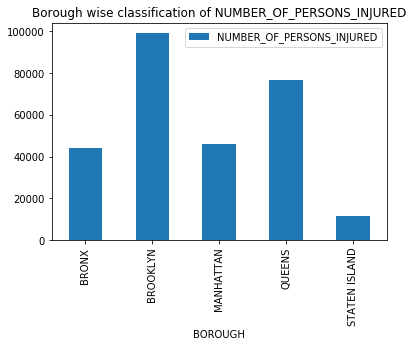

In [53]:
table_borough['NUMBER_OF_PERSONS_INJURED'].plot(kind='bar', title='Borough wise classification of NUMBER_OF_PERSONS_INJURED')
plt.legend(loc="upper right")

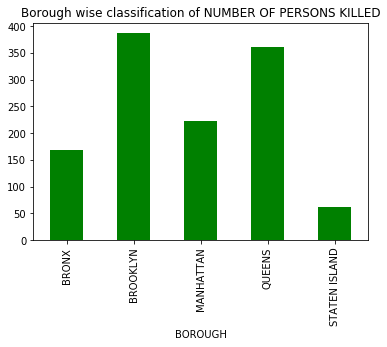

In [54]:
table_borough['NUMBER_OF_PERSONS_KILLED'].plot(kind='bar', 
                                               title='Borough wise classification of NUMBER OF PERSONS KILLED', color="green")

In [29]:
table['Year'] = pd.DatetimeIndex(table['DATE']).year
table.head()

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5,Year
0,2019-10-12,14:45,QUEENS,11436,40.6678,-73.7997,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,Unspecified,Unspecified,Unspecified,4222455,Taxi,Sedan,NaN,NaN,NaN,2019
1,2019-10-12,19:10,Unspecified,0,40.7322,-73.9943,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,Unspecified,Unspecified,Unspecified,4222160,2015,Taxi,NaN,NaN,NaN,2019
2,2019-10-11,12:45,Unspecified,0,0,0,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4222892,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2019
3,2019-10-11,15:36,Unspecified,0,0,0,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,4221708,Sedan,NaN,NaN,NaN,NaN,2019
4,2019-10-11,16:41,Unspecified,0,40.7268,-73.8385,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,Unspecified,Unspecified,4221716,Sedan,Sedan,NaN,NaN,NaN,2019


In [43]:
table['Year'] = pd.DatetimeIndex(table['DATE']).year
table_year=table.groupby(table.DATE.dt.year).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]
table_year

,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED
DATE,,
2012,22714.0,119.0
2013,48911.0,278.0
2014,56366.0,286.0
2015,57852.0,289.0
2016,56656.0,225.0
2017,56040.0,244.0
2018,63298.0,224.0
2019,53110.0,219.0


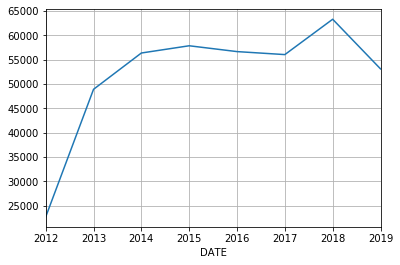

In [45]:
table_year['NUMBER_OF_PERSONS_INJURED'].plot(grid=True)

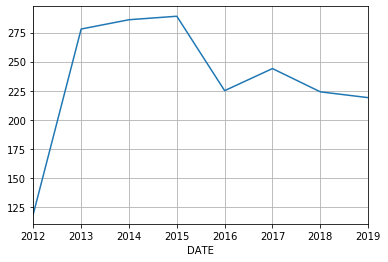

In [46]:
table_year['NUMBER_OF_PERSONS_KILLED'].plot(grid=True)

In [50]:
Contributing_factor = table['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts()

Contributing_factor = Contributing_factor.sort_values(ascending=False).dropna()
Contributing_factor=Contributing_factor.drop(['Unspecified'])
Contributing_factor

Driver Inattention/Distraction                 296441
Failure to Yield Right-of-Way                   90120
Following Too Closely                           78835
Backing Unsafely                                60974
Other Vehicular                                 51628
Fatigued/Drowsy                                 46966
Turning Improperly                              40723
Passing or Lane Usage Improper                  37560
Passing Too Closely                             34108
Unsafe Lane Changing                            30173
                                                ...  
Traffic Control Device Improper/Non-Working       570
Tow Hitch Defective                               167
Other Lighting Defects                            139
80                                                101
Eating or Drinking                                 79
Headlights Defective                               79
Tinted Windows                                     74
Vehicle Vandalism           

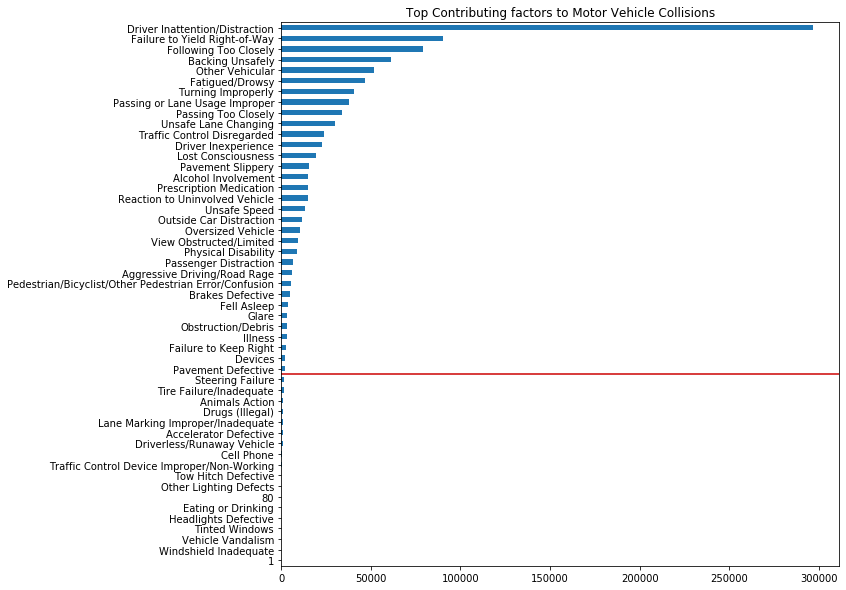

In [51]:
Contributing_factor.plot(kind='barh',title='Top Contributing factors to Motor Vehicle Collisions', figsize=(10,10)).invert_yaxis()
plt.axhline(len(Contributing_factor)-18.5, color='#CC0000')

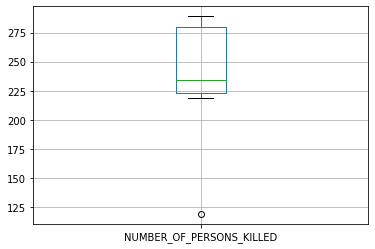

In [55]:
table_year.boxplot(column=['NUMBER_OF_PERSONS_KILLED'])

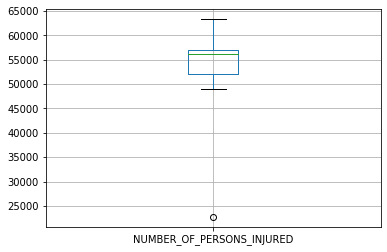

In [56]:
table_year.boxplot(column=['NUMBER_OF_PERSONS_INJURED'])